# Librerias

In [ ]:
# Limpieza

import pandas as pd
import numpy as np
import sys

# Visualización

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, minmax_scale

# Modelo 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance 


In [1]:
sys.path.append(r"C:/Users/gabri/Documents/Proyecto_ML_2025/src/utils/")

from Funciones import k_optimo

NameError: name 'sys' is not defined

In [ ]:
# Importamos  df

df = pd.read_csv('C:/Users/gabri/Documents/Proyecto_ML_2025/data/processed/super_shop_dataset_limpio_target.csv')

In [ ]:
# Mostramos dataset

df.head()

,employee_id,product_id,product_name,price,discount,stock,sold_quantity,rating,reviews,supplier,...,manufacturing_date,customer_gender,customer_type,payment_method,transaction_id,order_status,delivery_time,return_status,feedback,desercion_de_clientes
0,801,P1000,Item_D,2684,23,192,21,1.5,427,Supplier_C,...,2024-01-01,Male,Regular,Mobile Payment,T50000,Pending,2,Not Returned,Average,posible abandono
1,173,P1001,Item_A,2704,15,21,62,2.6,383,Supplier_B,...,2024-01-02,Female,Regular,Credit Card,T50001,Completed,12,Not Returned,Good,cliente
2,974,P1002,Item_C,3173,6,66,11,3.9,50,Supplier_A,...,2024-01-03,Male,New,Credit Card,T50002,Pending,7,Returned,Average,posible abandono
3,206,P1003,Item_D,4320,26,180,9,4.5,106,Supplier_A,...,2024-01-04,Male,VIP,Credit Card,T50003,Cancelled,13,Not Returned,Good,posible abandono
4,994,P1004,Item_B,2557,34,81,73,2.0,72,Supplier_C,...,2024-01-05,Female,Regular,Mobile Payment,T50004,Pending,11,Returned,Good,posible abandono


In [ ]:
# convertimos categoricos a numericos

le = LabelEncoder()

for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])


In [ ]:
# Separamos data set en X,y

X = df.drop(['desercion_de_clientes'],axis=1) 
y = df['desercion_de_clientes']

In [ ]:
# Vemos la estructura 

print(X.shape)
print(y.shape)

(5000, 22)
(5000,)


In [ ]:
# Separamos en entrenamiento y en prueba y asignamos el tamanho del entrenamiento 

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
# Normalizamos

# escala = StandardScaler()
# X_train = escala.fit_transform(X_train)
# X_test= escala.transform(X_test)


In [ ]:
# usamos nuestra funcion para ver el mejor k
mejor_k, precision = k_optimo(X_train, y_train, X_test, y_test)


In [ ]:
# Desempaquetamos nuestra tupla ya que la funcion devuelve una lista de tuplas 

k, accu = zip(*precision)

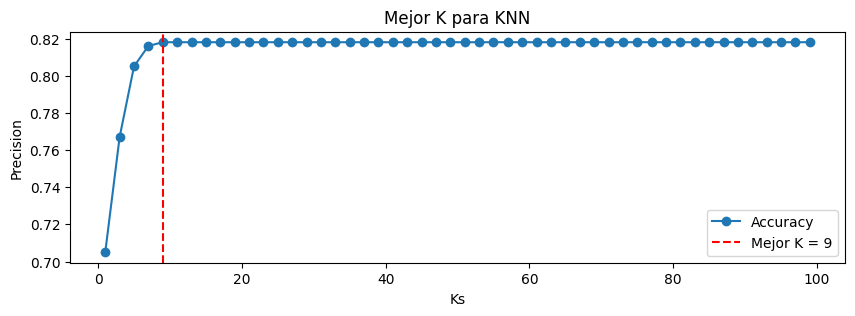

In [ ]:
# graficamos 

plt.figure(figsize=(10, 3))
plt.plot(k,accu, marker='o', label='Accuracy')
plt.axvline(mejor_k[0], linestyle='--',color='r', label=f'Mejor K = {mejor_k[0]}')

plt.xlabel('Ks')
plt.ylabel('Precision')
plt.title('Mejor K para KNN')
plt.legend()
plt.show()


Aqui podemos observar que los mejores valores de  k en el rango de 1 al 100 con numeros impares  es el 47 el que nos devuelve mejor precision

In [ ]:
# Entrenamos nuestro modelo con k = 47 que fue el mejor resultado de nuestra prueba 

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# predecimos

y_pred = knn.predict(X_test)

In [ ]:
# Vemos la precision

print(f'Precision : {accuracy_score(y_test, y_pred)}')

Precision : 0.818


Vemos que efectivamente los resultados fueron los esperados pero aun asi haremos  un evaluo de nuestras columnas para ver cual afecta mas a nuestro modelo y ver si podemos eliminar algunas columnas lo cual hara nuestro modelo mas optimo

In [ ]:
# vemos que features tienen mas peso en nuestro modelo 

score = permutation_importance(knn, X_test, y_test, scoring='accuracy',random_state=42)
importancia = score.importances_mean

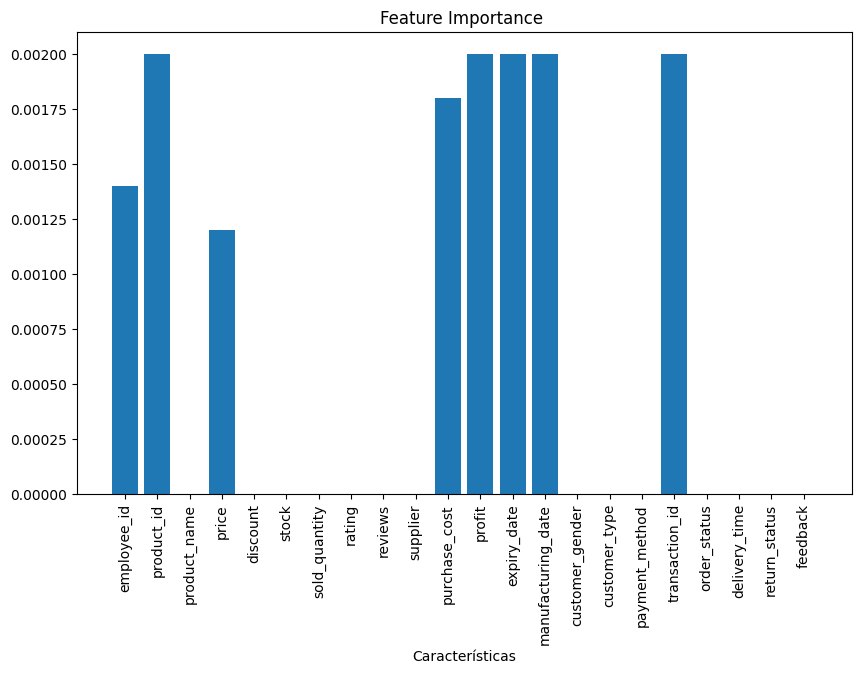

In [ ]:
# Graficamos

plt.figure(figsize=(10, 6))
plt.bar(range(len(importancia)), importancia, align='center')
plt.xticks(range(len(importancia)), X.columns, rotation=90)
plt.xlabel('Características')
plt.title('Feature Importance ')
plt.show()



hasta los momentos vemos que  las columnas que estan haciendo efecto a nuestros modelos son: 

`'employee_id','product_id', 'price', 'discount', 'reviews','stock', 'sold_quantity','purchase_cost', 'profit', 'expiry_date', 'manufacturing_date','transaction_id'`

In [ ]:
# Separamos nuestra target denuevo solo dejando las columnas que tienen mas peso en nuestro modelo

X = df[['employee_id','product_id','price','discount','final_price',
        'stock','sold_quantity','reviews','purchase_cost',
        'profit','expiry_date','manufacturing_date','shelf_number',
        'transaction_id',]]

y = df['return_status']

KeyError: "['final_price', 'shelf_number'] not in index"

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
# usamos nuestra funcion para ver el mejor k
mejor_k, precision = k_optimo(X_train, y_train, X_test, y_test)

In [ ]:
# Desempaquetamos nuestra tupla ya que la funcion devuelve una lista de tuplas 

k, accu = zip(*precision)

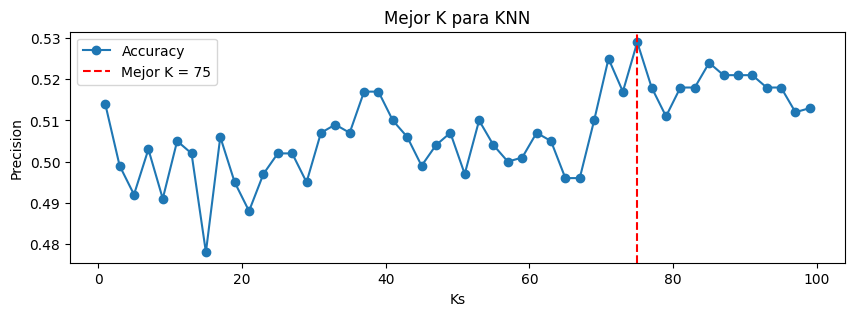

In [ ]:
# graficamos 

plt.figure(figsize=(10, 3))
plt.plot(k,accu, marker='o', label='Accuracy')
plt.axvline(mejor_k[0], linestyle='--',color='r', label=f'Mejor K = {mejor_k[0]}')

plt.xlabel('Ks')
plt.ylabel('Precision')
plt.title('Mejor K para KNN')
plt.legend()
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=75)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f'Precision : {accuracy_score(y_test, y_pred)}')


Precision : 0.529
